In [11]:
#numpy
import numpy as np

#chargement des posts dans une liste
import os
os.chdir("C:/Users/kenan/Desktop/textmining")

#import pandas
import pandas
disney = pandas.read_csv("disney_comment.txt",sep=",",header=0)


In [12]:
#type
print(type(disney))

<class 'pandas.core.frame.DataFrame'>


In [13]:
#énumération des colonnes
print(disney.columns)

Index(['Review_ID', 'Review_Rate', 'Review_Time', 'Review_Text',
       'Review_Visite'],
      dtype='object')


In [14]:
#type des colonnes
print(disney.dtypes)

Review_ID        object
Review_Rate       int64
Review_Time      object
Review_Text      object
Review_Visite    object
dtype: object


In [6]:
#description
print(disney.describe())

       Review Rate
count  1467.000000
mean      4.311520
std       1.194758
min       1.000000
25%       4.000000
50%       5.000000
75%       5.000000
max       5.000000


In [7]:
#dimension
print(disney.shape)

(1467, 5)


In [16]:
#afficher le contenu de la colonne review rate
print(disney['Review_Text'])

0                                              no comment
1       Un incontournable, clap de fin d’un séjour mag...
2                                              no comment
3       (Traduit par Google) L'anticipation était prob...
4                                              no comment
                              ...                        
1462                                           no comment
1463                                           no comment
1464                                           no comment
1465    (Traduit par Google) Le mot "meh" me vient à l...
1466                                           no comment
Name: Review_Text, Length: 1467, dtype: object


In [15]:
#fréquence du nombre de notes
print(disney.Review_Rate.value_counts())

5    974
4    242
1    106
3     91
2     54
Name: Review_Rate, dtype: int64


In [83]:
#fonction pour ne garder que le commentaire traduit
def find_between( s, first, last ):
    try:
        start = s.index( first ) + len( first )
        end = s.index(last)
        return s[start:end]
    except ValueError:
        return ""

In [91]:
#création d'une nouvelle colonne avce uniquement le commentaire traduit
disney['Text'] = disney['Review_Text'].apply(lambda x: find_between(x, "(Traduit par Google)" ,"(Avis d'origine)"))

In [92]:
#importer la classe CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
parseur = CountVectorizer()

#pour la colonne "Text"
X = parseur.fit_transform(disney['Text'])

#liste des tokens
print(parseur.get_feature_names_out())



['02' '10' '100' ... 'êtes' 'être' 'œil']


In [93]:
#nombre de tokens
print(len(parseur.get_feature_names_out()))

2879


In [94]:
#construire la matrice
mdt = X.toarray()
print(type(mdt))
print(mdt.shape)

<class 'numpy.ndarray'>
(1467, 2879)


In [95]:
#apparition des mots
freq_mots = np.sum(mdt,axis=0)
print(freq_mots)

[ 1 13  6 ... 20 53  2]


In [96]:
#argsort
index = np.argsort(freq_mots)
print(index)

[   0 1647 1646 ... 1491 1017  730]


In [97]:
#astuce pour imprimer en deux colonnes
imp = {'terme':np.asarray(parseur.get_feature_names())[index],'freq':freq_mots[index]}
print(pandas.DataFrame(imp))


          terme  freq
0            02     1
1     minimales     1
2       minimal     1
3          mini     1
4      minables     1
...         ...   ...
2874         la   382
2875         le   425
2876        les   453
2877         et   600
2878         de   727

[2879 rows x 2 columns]


c:\Users\kenan\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [27]:
#importer la librairie NLTK
import nltk
#installer "Stopwords corpus" à partir de l'onglet "CORPORA"
#nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [98]:
#charger les stopwords
from nltk.corpus import stopwords
stwf = stopwords.words('french')

In [99]:

#nombre
print(len(stwf))

157


In [100]:

#afficher
print(stwf)

['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 'aur

In [101]:

#affichage trié
print(np.sort(stwf))

['ai' 'aie' 'aient' 'aies' 'ait' 'as' 'au' 'aura' 'aurai' 'auraient'
 'aurais' 'aurait' 'auras' 'aurez' 'auriez' 'aurions' 'aurons' 'auront'
 'aux' 'avaient' 'avais' 'avait' 'avec' 'avez' 'aviez' 'avions' 'avons'
 'ayant' 'ayante' 'ayantes' 'ayants' 'ayez' 'ayons' 'c' 'ce' 'ces' 'd'
 'dans' 'de' 'des' 'du' 'elle' 'en' 'es' 'est' 'et' 'eu' 'eue' 'eues'
 'eurent' 'eus' 'eusse' 'eussent' 'eusses' 'eussiez' 'eussions' 'eut'
 'eux' 'eûmes' 'eût' 'eûtes' 'furent' 'fus' 'fusse' 'fussent' 'fusses'
 'fussiez' 'fussions' 'fut' 'fûmes' 'fût' 'fûtes' 'il' 'ils' 'j' 'je' 'l'
 'la' 'le' 'les' 'leur' 'lui' 'm' 'ma' 'mais' 'me' 'mes' 'moi' 'mon'
 'même' 'n' 'ne' 'nos' 'notre' 'nous' 'on' 'ont' 'ou' 'par' 'pas' 'pour'
 'qu' 'que' 'qui' 's' 'sa' 'se' 'sera' 'serai' 'seraient' 'serais'
 'serait' 'seras' 'serez' 'seriez' 'serions' 'serons' 'seront' 'ses'
 'soient' 'sois' 'soit' 'sommes' 'son' 'sont' 'soyez' 'soyons' 'suis'
 'sur' 't' 'ta' 'te' 'tes' 'toi' 'ton' 'tu' 'un' 'une' 'vos' 'votre'
 'vous' 'y' 'à

In [102]:
#on va ajouter le stopword 'les'
stwf.append('les')


#afficher
print(np.sort(stwf))


['ai' 'aie' 'aient' 'aies' 'ait' 'as' 'au' 'aura' 'aurai' 'auraient'
 'aurais' 'aurait' 'auras' 'aurez' 'auriez' 'aurions' 'aurons' 'auront'
 'aux' 'avaient' 'avais' 'avait' 'avec' 'avez' 'aviez' 'avions' 'avons'
 'ayant' 'ayante' 'ayantes' 'ayants' 'ayez' 'ayons' 'c' 'ce' 'ces' 'd'
 'dans' 'de' 'des' 'du' 'elle' 'en' 'es' 'est' 'et' 'eu' 'eue' 'eues'
 'eurent' 'eus' 'eusse' 'eussent' 'eusses' 'eussiez' 'eussions' 'eut'
 'eux' 'eûmes' 'eût' 'eûtes' 'furent' 'fus' 'fusse' 'fussent' 'fusses'
 'fussiez' 'fussions' 'fut' 'fûmes' 'fût' 'fûtes' 'il' 'ils' 'j' 'je' 'l'
 'la' 'le' 'les' 'les' 'leur' 'lui' 'm' 'ma' 'mais' 'me' 'mes' 'moi' 'mon'
 'même' 'n' 'ne' 'nos' 'notre' 'nous' 'on' 'ont' 'ou' 'par' 'pas' 'pour'
 'qu' 'que' 'qui' 's' 'sa' 'se' 'sera' 'serai' 'seraient' 'serais'
 'serait' 'seras' 'serez' 'seriez' 'serions' 'serons' 'seront' 'ses'
 'soient' 'sois' 'soit' 'sommes' 'son' 'sont' 'soyez' 'soyons' 'suis'
 'sur' 't' 'ta' 'te' 'tes' 'toi' 'ton' 'tu' 'un' 'une' 'vos' 'votre'
 'vous' 

In [104]:

#reconstruire la mdt sans les stopwords
parseur_bis = CountVectorizer(stop_words=stwf)
X_bis = parseur_bis.fit_transform(disney['Text'])


#liste des tokens
print(len(parseur_bis.get_feature_names_out()))
print(parseur_bis.get_feature_names_out())


2783
['02' '10' '100' ... 'événements' 'être' 'œil']


In [105]:

#mdt_bis
mdt_bis = X_bis.toarray()
print(mdt_bis.shape)

(1467, 2783)


In [106]:

#apparition des mots
freq_mots_bis = np.sum(mdt_bis,axis=0)
print(freq_mots_bis)


[ 1 13  6 ...  5 53  2]


In [107]:

#argsort
index_bis = np.argsort(freq_mots_bis)
print(index_bis)


[   0 1610 1607 ... 1795 1937 2582]


In [108]:

#astuce pour imprimer en deux colonnes
imp = {'terme':np.asarray(parseur_bis.get_feature_names_out())[index_bis],'freq':freq_mots_bis[index_bis]}
print(pandas.DataFrame(imp))

             terme  freq
0               02     1
1            mises     1
2     minutestemps     1
3           minuit     1
4         ministre     1
...            ...   ...
2778          tout   114
2779       attente   139
2780          parc   145
2781          plus   158
2782          très   160

[2783 rows x 2 columns]


In [109]:

#rajouter les chiffres en stop words
stwf.extend(['zero','un','deux','trois','quatre','cinq','six','sept','huit','neuf','dix'])
print(stwf)

['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 'aur

In [110]:

#reconstruire la mdt
parseur_ter = CountVectorizer(stop_words=stwf)
X_ter = parseur_ter.fit_transform(disney['Text'])
#liste des tokens
print(len(parseur_ter.get_feature_names_out()))
print(parseur_ter.get_feature_names_out())
#mdt_ter
mdt_ter = X_ter.toarray()
print(mdt_ter.shape)
#apparition des mots
freq_mots_ter = np.sum(mdt_ter,axis=0)
print(freq_mots_ter)
#argmax
index_ter = np.argsort(freq_mots_ter)
print(index_ter)
#astuce pour imprimer en deux colonnes
imp = {'terme':np.asarray(parseur_ter.get_feature_names_out())[index_ter],'freq':freq_mots_ter[index_ter]}
print(pandas.DataFrame(imp))

2779
['02' '10' '100' ... 'événements' 'être' 'œil']
(1467, 2779)
[ 1 13  6 ...  5 53  2]
[   0 1608 1605 ... 1793 1935 2578]
             terme  freq
0               02     1
1            mises     1
2     minutestemps     1
3           minuit     1
4         ministre     1
...            ...   ...
2774          tout   114
2775       attente   139
2776          parc   145
2777          plus   158
2778          très   160

[2779 rows x 2 columns]


In [111]:
#******************
#SVD en 10 facteurs
#******************
#importation de la classe
from sklearn.decomposition import TruncatedSVD
#instanciation
svd = TruncatedSVD(n_components=10,algorithm="arpack")
#apprentissage
csvd = svd.fit_transform(mdt_ter.astype(float)) # ou (1.0*mdt_ter)
#attributs de l'objet
print(dir(svd))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_check_feature_names', '_check_n_features', '_get_param_names', '_get_tags', '_more_tags', '_n_features_out', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_validate_data', 'algorithm', 'components_', 'explained_variance_', 'explained_variance_ratio_', 'fit', 'fit_transform', 'get_feature_names_out', 'get_params', 'inverse_transform', 'n_components', 'n_features_in_', 'n_iter', 'n_oversamples', 'power_iteration_normalizer', 'random_state', 'set_params', 'singular_values_', 'tol', 'transform']


In [112]:
#variance expliquée par facteur
print(svd.explained_variance_ratio_)

[0.13941641 0.03753684 0.0294044  0.02663643 0.02300119 0.0225302
 0.01954976 0.01807877 0.01576752 0.0151967 ]


In [113]:
#total variance expliquée
print(np.sum(svd.explained_variance_ratio_))

0.3471182263937199


In [114]:
#dimension du tableau des valeurs
print(svd.components_.shape)

(10, 2779)


In [115]:
#somme des carrés des valeurs en ligne
print(np.sum(svd.components_**2,axis=1))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [116]:
#détecter les 5 termes les plus fortement liés (CTR) avec chaque facteur
carreTermes = svd.components_**2

#pour chaque facteur
for i in range(carreTermes.shape[0]):
    #index des valeurs triées
    index = np.argsort(carreTermes[i,:])
    #inversion pour que les max. soient en premier
    index = index[::-1] #ou encore index = np.flip(index)
    #affichage des 5 premiers
    print("FACTEUR : "+ str(i))
    for j in range(5):
        print(parseur_ter.get_feature_names_out()[index[j]]+":"+str(svd.components_[i,index[j]]))
    print("")


FACTEUR : 0
plus:0.3065755930079049
très:0.29781656920834204
parc:0.2386991342687345
attente:0.2371848088759794
tout:0.22333962521332917

FACTEUR : 1
entrée:0.34263021574275826
sécurité:0.31597633332632674
sud:0.30906073357826214
attente:-0.2339067474389418
disneyland:0.19526622120399784

FACTEUR : 2
disney:0.5625053547025811
attente:-0.25157385743479893
très:-0.21469414003582216
fois:0.1502094496140317
files:-0.1375677104266335

FACTEUR : 3
attractions:-0.30692971514971806
parc:-0.26231770169582325
plus:0.18638343992245743
vraiment:0.1854282700648028
manèges:0.18121069576698248

FACTEUR : 4
attente:-0.4058908379753176
attractions:0.24995904534892185
disneyland:0.20574660325636804
files:-0.19359620911204653
entrée:-0.19305404794221842

FACTEUR : 5
parc:-0.32561846256168514
disneyland:0.3044433330459037
tout:-0.281884667431016
si:0.27516450872102344
attractions:-0.1848749576872327

FACTEUR : 6
parc:0.31682706455608056
spectacle:0.2069330793003272
bien:0.18065435678808373
jours:-0.148763

In [117]:
#dim. de la matrice des observations
print(csvd.shape)

(1467, 10)


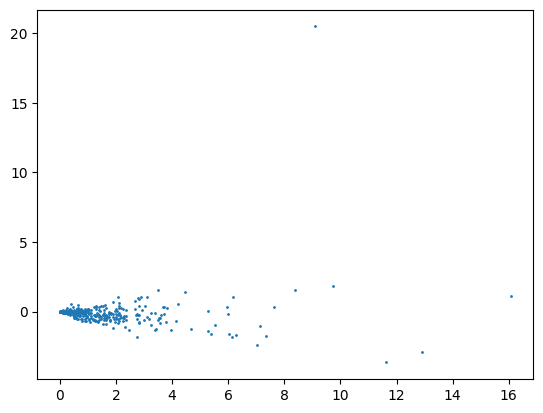

In [120]:

#représentation des points dans le premier plan
import matplotlib.pyplot as plt
plt.scatter(csvd[:,0],csvd[:,1],s=1)
plt.show()

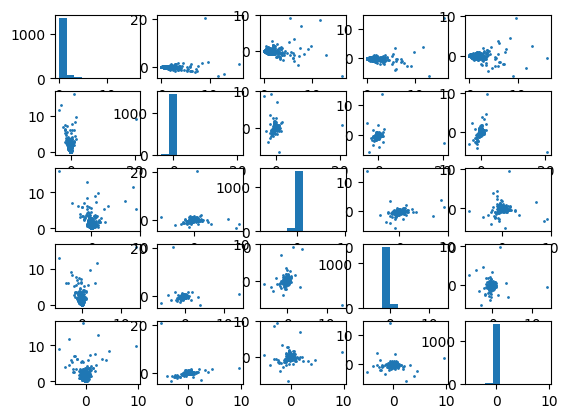

In [121]:

#graphique deux à deux sur les 5 premiers facteurs
#on peut le faire aussi, plus simplement avec seaborn par ex.
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(5,5)
for i in range(5):
    for j in range(5):
        ax = plt.subplot(gs[i,j])
        if (i == j):
            ax.hist(csvd[:,i])            
        else:
            ax.scatter(csvd[:,i],csvd[:,j],s=1)
plt.show()

In [122]:
#les numéros des documents excentrés sur le 1er facteur
outliers = np.where(csvd[:,0] > 2.0)
print(outliers)

(array([   3,   14,   66,   77,   80,  110,  111,  188,  194,  208,  210,
        217,  245,  257,  274,  284,  286,  294,  304,  315,  360,  372,
        394,  408,  409,  413,  415,  418,  446,  463,  488,  522,  524,
        540,  541,  550,  556,  561,  573,  615,  630,  642,  658,  662,
        672,  696,  698,  735,  752,  764,  794,  798,  802,  814,  829,
        838,  866,  876,  883,  939,  954,  959,  967, 1034, 1035, 1044,
       1072, 1076, 1087, 1094, 1101, 1111, 1126, 1180, 1207, 1220, 1232,
       1268, 1319, 1328, 1338, 1339, 1380, 1410, 1433, 1459], dtype=int32),)


In [123]:

#index des outliers
indexOutliers = np.array(outliers[0],dtype=int)
print(indexOutliers)

[   3   14   66   77   80  110  111  188  194  208  210  217  245  257
  274  284  286  294  304  315  360  372  394  408  409  413  415  418
  446  463  488  522  524  540  541  550  556  561  573  615  630  642
  658  662  672  696  698  735  752  764  794  798  802  814  829  838
  866  876  883  939  954  959  967 1034 1035 1044 1072 1076 1087 1094
 1101 1111 1126 1180 1207 1220 1232 1268 1319 1328 1338 1339 1380 1410
 1433 1459]


In [125]:
#affichage des commentaires concernés
print(disney.loc[indexOutliers,'Text'])

3        L'anticipation était probablement la plus gra...
14       Nous avons visité le 4 janvier, à une période...
66       J'ai eu une très mauvaise expérience avec Dis...
77       J'y étais pour la première fois au début de l...
80       Été à Euro Disney 3-4-5 janvier 2023. Désolé ...
                              ...                        
1339     La normalité est revenue à Disneyland. 🎉Le se...
1380     Super parc d'amusement ! Un peu plus petit qu...
1410     Peu de montagnes russes pour LE prix d'entrée...
1433     C'est un endroit unique incroyablement beau. ...
1459     Cet endroit a une direction que vous pourriez...
Name: Text, Length: 86, dtype: object


In [126]:

#affichage des notes
print(disney.loc[indexOutliers,'Review_Rate'])

3       3
14      5
66      1
77      4
80      3
       ..
1339    5
1380    4
1410    2
1433    5
1459    3
Name: Review_Rate, Length: 86, dtype: int64


In [127]:
#****************
#LDA en 10 topics
#****************

#importation de la classe
from sklearn.decomposition import LatentDirichletAllocation

#instanciation
lda = LatentDirichletAllocation(n_components=10,random_state=0)

#resultats
clda = lda.fit_transform(mdt_ter)

#propriétés de l'objet
print(dir(lda))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_approx_bound', '_check_feature_names', '_check_n_features', '_check_non_neg_array', '_check_params', '_e_step', '_em_step', '_get_param_names', '_get_tags', '_init_latent_vars', '_more_tags', '_n_features_out', '_perplexity_precomp_distr', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_unnormalized_transform', '_validate_data', 'batch_size', 'bound_', 'components_', 'doc_topic_prior', 'doc_topic_prior_', 'evaluate_every', 'exp_dirichlet_component_', 'fit', 'fit_transform', 'get_feature_names_out', 'get_params', 'learning_decay', 'learning_method', 'learning_offset', 'max_doc_update_iter', 'max_iter', 'm

In [128]:
#components
print(lda.components_.shape)

(10, 2779)


In [129]:
#pour chaque facteur
for i in range(lda.components_.shape[0]):
    #index des valeurs triées
    index = np.argsort(lda.components_[i,:])
    #inversion pour que les max. soient en premier
    index = index[::-1]
    #affichage des 5 premiers
    print("TOPIC : "+ str(i))
    for j in range(5):
        print(parseur_ter.get_feature_names_out()[index[j]]+":"+str(lda.components_[i,index[j]]))
    print("")


TOPIC : 0
entrée:10.738249140767806
sécurité:8.100079031611799
sud:8.099999999970581
disneyland:7.102861285991982
moment:7.0984445041141315

TOPIC : 1
attente:15.495485021314405
beaucoup:11.336762927672705
files:7.805801013375431
magique:6.0288582741373595
lieu:5.862315761488776

TOPIC : 2
peu:9.674561678322576
plus:7.852279867369041
attente:7.50473036945897
attractions:6.9206596124647675
donc:6.867371024071831

TOPIC : 3
très:66.2283753144833
si:46.93147334678159
plus:43.60607862177608
parc:38.932612678124585
tout:37.00330706098519

TOPIC : 4
très:58.65768718960957
plus:47.57275261211364
attente:42.41627223013236
parc:41.70525830429772
enfants:31.35363813992442

TOPIC : 5
disney:11.08137594537232
jamais:6.811166949544263
attente:5.322878770520195
endroit:5.1001756988240325
car:4.726011569597496

TOPIC : 6
plus:6.100040530526074
attractions:5.50897093173993
prix:4.100085343110975
parc:4.100039043575797
disney:4.100027525331179

TOPIC : 7
parc:19.257760168692535
disney:17.66531421241957

In [130]:
#informations sur les individus
print(clda.shape)

#calcul de la somme par ligne
print(np.sum(clda,axis=1))


(1467, 10)
[1. 1. 1. ... 1. 1. 1.]


In [131]:
#topic de rattachement pour chaque individu
topicIndiv = np.argmax(clda,axis=1)
print(topicIndiv)

#distribution de fréquences
idTopic, nbTopic = np.unique(topicIndiv,return_counts=True)
print(idTopic)
print(nbTopic)


[0 0 0 ... 0 2 0]
[0 1 2 3 4 5 6 7 8 9]
[1149   23   20   92   67   15   14   21   54   12]


In [132]:
#topic le plus populaire
print(np.argmax(nbTopic))

#croisement avec la note
disney_topics = pandas.crosstab(disney['Review_Rate'],topicIndiv)
print(disney_topics)

0
col_0          0  1  2   3   4  5  6   7   8  9
Review_Rate                                    
1             71  2  4   6  10  3  2   2   4  2
2             32  3  2   3   6  0  0   1   6  1
3             57  1  5  10  11  1  1   2   2  1
4            179  8  3  19   9  2  3   3  14  2
5            810  9  6  54  31  9  8  13  28  6


In [133]:
#somme pour chaque ligne
somme_ligne = np.sum(disney_topics,axis=1)
print(somme_ligne)

#profil ligne en passant par quelque chose qui ressemble au apply() de R
def profil(x):
    return(x/np.sum(x))

profil_ligne = np.apply_along_axis(profil,axis=1,arr=disney_topics.values)
print(pandas.DataFrame(profil_ligne).round(2))


Review_Rate
1    106
2     54
3     91
4    242
5    974
dtype: int64
      0     1     2     3     4     5     6     7     8     9
0  0.67  0.02  0.04  0.06  0.09  0.03  0.02  0.02  0.04  0.02
1  0.59  0.06  0.04  0.06  0.11  0.00  0.00  0.02  0.11  0.02
2  0.63  0.01  0.05  0.11  0.12  0.01  0.01  0.02  0.02  0.01
3  0.74  0.03  0.01  0.08  0.04  0.01  0.01  0.01  0.06  0.01
4  0.83  0.01  0.01  0.06  0.03  0.01  0.01  0.01  0.03  0.01


In [134]:
#récupérer les modalités de la note
modalites = pandas.unique(disney['Review_Rate'])
print(modalites)

#élaborer la première ligne de la matrice
mc = np.zeros(shape=(1,mdt_ter.shape[1]))
print(mc.shape)


[5 3 2 4 1]
(1, 2779)


In [135]:
#mots les plus utilisés en moyenne pour chaque modalité
for moda in modalites:
    print('>>> ' + moda + ' <<<')
    #nombre de réponse
    concernes = np.asarray(disney['Review_Rate']==moda)
    nb_repondants = np.sum(concernes)
    print('Nb de répondants concernees = ' + str(nb_repondants))
    #récupérer les freq. corresp.
    sm = np.sum(mdt_ter[concernes,:],axis=0)
    sm = np.reshape(sm,newshape=(1,mc.shape[1]))
    mc = np.append(mc,sm,axis=0)


TypeError: can only concatenate str (not "numpy.int64") to str